# Loops

## Iterating using `for`

Examples

In [2]:
basket = ['apple', 'orange', 'banana', 'lemon', 'lime']
for fruit in basket:
    print('I ate one ' + fruit)
print("I'm full now!")


I ate one apple
I ate one orange
I ate one banana
I ate one lemon
I ate one lime
I'm full now!


In [3]:
word = 'supercalifragilisticexpialidocious'
print('Spell it out!')
for letter in word:
    print(letter)
print('That wore me out.')


Spell it out!
s
u
p
e
r
c
a
l
i
f
r
a
g
i
l
i
s
t
i
c
e
x
p
i
a
l
i
d
o
c
i
o
u
s
That wore me out.


## Practice

Print the number of characters in each string in the list below. Recall that the `len()` function returns the number of characters in a string.

In [5]:
words = ['fabulous',' a','uncle', 'unbelievable','!@#$%^&*']
for length in words:
    print(len(length))
print('Wowza! That was a lot of words!')

8
2
5
12
8
Wowza! That was a lot of words!


## Building a sequence with a for loop

The pattern of creating an empty thing and then adding a sequence of items to it in a loop is a common one. 

```
sequence = sequence + item
```

can be replaced with 

```
sequence += item
```

Code with explicit concatenation:

In [6]:
list_of_words = ['The ', 'quick ', 'brown ', 'fox ', 'jumps ', 'over ', 'the ', 'lazy ', 'dog ']
sentence = ''
for word in list_of_words:
    sentence = sentence + word # Concatenate the word to the sentence
print(sentence + '!')


The quick brown fox jumps over the lazy dog !


Code with shorthand:


In [7]:
sentence = ''
for word in list_of_words:
    sentence += word
print(sentence + '!')

The quick brown fox jumps over the lazy dog !


Same strategy, but doing creating a total by summing a list of numbers:


In [8]:
total = 0
for number in [3, 5, 7, 9]:
    total += number
print('The total is', total)

The total is 24


Using a `range()` object to create a list from user input:


In [9]:
bird_list = []
for i in range(4):
    bird = input('Enter a bird name: ')
    bird_list.append(bird)
print('Your bird list is:', bird_list)

Your bird list is: ['hawk', 'eagle', 'falcon', 'sparrow']


# Iterating through rows in a DataFrame

One of the main purposes of pandas is to make it possible to perform operations on entire columns using vectorized operations. However, there are some situations where it makes sense to iterate through each row in the DataFrame and deal with values one row at a time. These situations would include complex operations that require multiple lines of code to describe, or actions that must happen sequentially, such as retrieving data from a URL.

Our example will use information about websites

In [10]:
import pandas as pd
websites = {
    'name': {'alphabet': 'Google', 'vu': 'Vanderbilt', 'fake': 'Obsolete Website'}, 
    'url': {'alphabet': 'https://www.google.com/', 'vu': 'https://www.vanderbilt.edu/', 'fake': 'https://example.org/fake_url'},
    'status': {'alphabet': 'unknown', 'vu': 'unknown', 'fake': 'unknown'}
           }
websites_df = pd.DataFrame(websites)
websites_df

,name,url,status
alphabet,Google,https://www.google.com/,unknown
vu,Vanderbilt,https://www.vanderbilt.edu/,unknown
fake,Obsolete Website,https://example.org/fake_url,unknown


To generate an iterable object from the DataFrame we use the `.iterrows()` method. Iterating using a `for` loop generates a tuple consisting of the label index and the data from the row, in the form of a Series.

In [11]:
for label_index, website_series in websites_df.iterrows():
    print(label_index)
    print()
    print(website_series)
    print()
    print()

alphabet

name                       Google
url       https://www.google.com/
status                    unknown
Name: alphabet, dtype: object


vu

name                       Vanderbilt
url       https://www.vanderbilt.edu/
status                        unknown
Name: vu, dtype: object


fake

name                  Obsolete Website
url       https://example.org/fake_url
status                         unknown
Name: fake, dtype: object




To access a value from the row Series, we can use direct indexing by providing the column label index.

In [12]:
for label_index, website_series in websites_df.iterrows():
    print(website_series['url'])
    print()

https://www.google.com/

https://www.vanderbilt.edu/

https://example.org/fake_url



Iterating will allow us to check the status of each website one at a time.

In [13]:
import requests
for label_index, website_series in websites_df.iterrows():
    response = requests.get(website_series['url'])
    # HTTP status code 200 means the website is up, 404 means it's down.
    print(label_index, website_series['url'], response.status_code)
    # Assign the status to the status column in the DataFrame
    websites_df.loc[label_index, 'status'] = response.status_code

# Print the updated DataFrame
websites_df

alphabet https://www.google.com/ 200
vu https://www.vanderbilt.edu/ 200
fake https://example.org/fake_url 404


,name,url,status
alphabet,Google,https://www.google.com/,200
vu,Vanderbilt,https://www.vanderbilt.edu/,200
fake,Obsolete Website,https://example.org/fake_url,404


## Practice

Use the .head() method to assign the first 10 rows of the schools DataFrame to a new DataFrame called `schools_subset`. Then iterate through the rows of `schools_subset` and print the `School Name` and `Zip Code` for each row.

# Conditional execution

## if statement

After running the following example, try changing the boolean value of `is_friday` from `False` to `True` and run it again. Notice that `False` is not the string `'False'` because it is not in quotes.

In [15]:
is_friday = False

if is_friday:
    print('Woopie! ')
    print('TGIF !')

Woopie! 
TGIF !


In the following example, the value of `is_mickey` is evaluated as a boolean object. The boolean value is then used to determin whether to execute the code block following the `if` statement. Try both code blocks with the existing name, then change the value of `name` to `Mickey Mouse`.

In [16]:
name = 'Fred Flintstone'

# Evaluate the boolean value of is_micky based on the comparison of name and 'Mickey Mouse'
is_micky = name == 'Mickey Mouse'
print(name)
print(is_micky)

Fred Flintstone
False


In [17]:
if is_micky:
    print('You are a Disney character')
print('That is all!')

That is all!


In this example, we evaluate the boolean value directly in the `if` statement itself rather than doing it earlier and assigning its value to a variable.

In [19]:
name = input('What is the name of the character? ')
print(name)

if name == 'Mickey Mouse':
    print('You are a Disney character')
print('That is all!')

Mickey Mouse
You are a Disney character
That is all!


This example is not very satisfying because if the character is not Mickey Mouse, there is no specific reaction wo what they typed. That might be confusing to the user.

## if … else …

Run the code, then try changing the value to `True`

In [20]:
is_friday = False

if is_friday:
    print('TGIF !')
else:
    print('Too bad, have a nice day anyway.')

Too bad, have a nice day anyway.


In this example, we solve the problem with the earlier code by defining a code block that should be executed if the evaluated condition is `False`.

In [22]:
name = input('What is the name of the character? ')
print(name)

if name == 'Mickey Mouse':
    print('You are a Disney character')
    print('You are out of copyright!')
else:
    print('You are not a Disney character')
print('That is all?')

Plutor
You are not a Disney character
That is all?


## if … elif … else …

Example:

In [24]:
name = input('What is the name of the character? ')
print(name)

if name == 'Mickey Mouse':
    print('You are a Disney character')
    print('You are a mouse')
elif name == 'Donald Duck':
    print('You are a Disney character')
    print('You are not a mouse')
elif name == 'Minnie Mouse':
    print('You are a Disney character')
    print('Your boyfriend is getting old')
else:
    print('You are not a Disney character')
print("That's all folks!")

Donald Duck
You are a Disney character
You are not a mouse
That's all folks!


## Practice

Let the user enter an integer number, then test whether it is greater than zero. If it is, print that it is a positive number. Use `elif` and `else` to state whether the integer the user input is a negative number or zero. 

Don't forget to convert the input from a string to an integer using the `int()` function.

Some starter code is provided in the cell below.

In [32]:
user_number = int(input('Enter your choice of an integer: '))
if user_number > 0:
    print('Your number is positive')
elif user_number < 0:
    print('Your number is negative')
else:
    print('Your number is zero')

Your number is negative


# try ... except ...

Try entering numeric and non-numeric characters in this example without error trapping.

In [34]:
from math import pi
typed_in = input('What is the diameter of your circle? ')
diameter = float(typed_in)
print('The circumference is:', diameter * pi)

ValueError: could not convert string to float: 'five'

Now try again with this script:

In [37]:
from math import pi
typed_in = input('What is the diameter of your circle? ')
try:
    diameter = float(typed_in)
    print('The circumference is:', diameter * pi)
except:
    print("Sorry, you didn't enter a number.")

The circumference is: 28.274333882308138


Now try running these two code blocks, first with a valid part number, then with a part number that is not in the catalog. The second block has error trapping; the first does not.

In [39]:
catalog = {'1008':'widget', '2149':'flange', '19x5':'smoke shifter', '992':'poiuyt'}
part_number = input("What part do you want to order? ")
print('You have ordered a ' + catalog[part_number])

KeyError: '1234'

In [41]:
catalog = {'1008':'widget', '2149':'flange', '19x5':'smoke shifter', '992':'poiuyt'}
part_number = input("What part do you want to order? ")
try:
    print('You have ordered a ' + catalog[part_number])
except:
    print("Sorry, that part isn't available.")
print("It's been a pleasure doing business with you!")

You have ordered a poiuyt
It's been a pleasure doing business with you!


## Practice

One possible problem is a "division by zero" error. Fix the following script to prevent a division by zero error using `try ... except ...` and print a warning if an error occurs.

In [46]:
print("Let's divide 100 by some integer number!")
user_number = int(input('Enter the number you want to divide by: '))
try:
    print(100/user_number)
except:
    print("Sorry, you can't divide by zero.")

Let's divide 100 by some integer number!


ValueError: invalid literal for int() with base 10: '9.8'

# Matplotlib

In [54]:

import matplotlib.pyplot as plt
import pandas as pd

injury_rate_list = [0.7, 1.0, 1.9, 2.0, 2.3, 2.4, 1.0]
stories_fallen_list = [2, 3, 4, 5, 6, 8, 11]


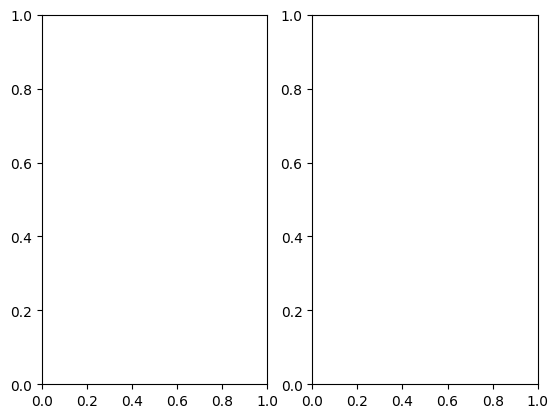

In [55]:
# Create a figure object
fig = plt.figure()

# Create 2 subplots with 1 row and 2 columns
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
plt.show() # displays the plot if you aren't using a Jupyter notebook


Important note: when used in Jupyter notebooks, Matplotlib plots must be developed within a single code cell.

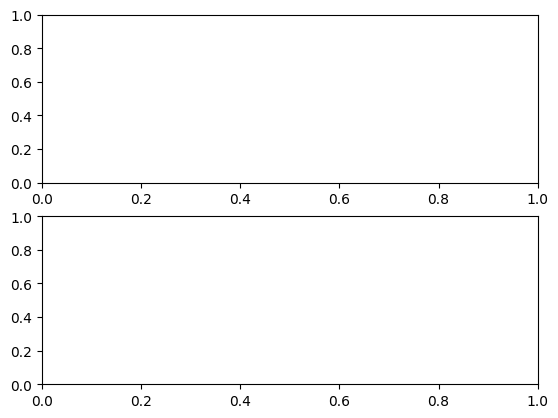

In [56]:
# Create a figure object
fig = plt.figure()

# Create 2 subplots with 2 rows and 1 column
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


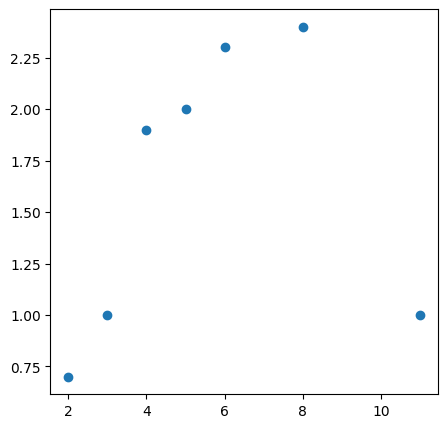

In [57]:
# Create a 5x5 figure object
fig = plt.figure(figsize=(5,5))

# Create a single subplot
ax = fig.add_subplot(1, 1, 1)
# Plot type .scatter() is a dot plot (scatterplot)
ax.scatter(stories_fallen_list, injury_rate_list)


More typically, we would have data in a pandas DataFrame. 

Generate a dataframe from the lists:

```
cat_injuries = pd.DataFrame({'stories_fallen': stories_fallen_list, 'average_injury_rate': injury_rate_list})
```

and use the column Series as the x and y values for the plot.

In [58]:
cat_injuries = pd.DataFrame({'stories_fallen': stories_fallen_list, 'average_injury_rate': injury_rate_list})
cat_injuries

,stories_fallen,average_injury_rate
0,2,0.7
1,3,1.0
2,4,1.9
3,5,2.0
4,6,2.3
5,8,2.4
6,11,1.0


Text(0, 0.5, 'average injury per cat')

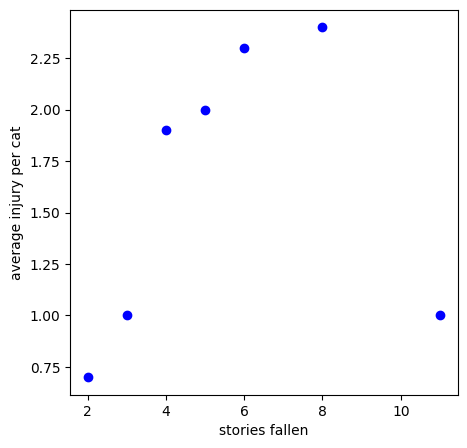

In [62]:
# Improve the plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(cat_injuries['stories_fallen'], cat_injuries['average_injury_rate'], color='b')

# set labels for subplot axes
ax.set_xlabel('stories fallen')
ax.set_ylabel('average injury per cat')

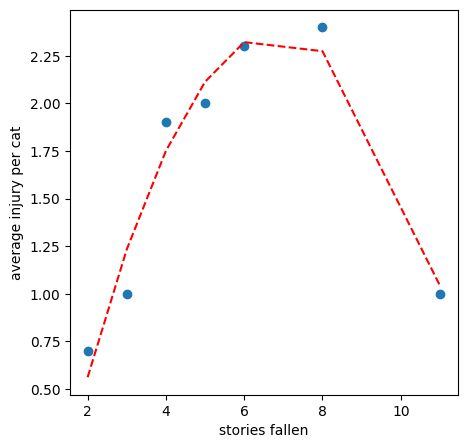

In [63]:
import numpy as np

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(cat_injuries['stories_fallen'], cat_injuries['average_injury_rate'])

ax.set_xlabel('stories fallen')
ax.set_ylabel('average injury per cat')

# Add a second-order polynomial best-fit curve using NumPy
z = np.polyfit(cat_injuries['stories_fallen'], cat_injuries['average_injury_rate'], 2)
p = np.poly1d(z)
# plot type .plot() is a line plot rather than scatterplot
ax.plot(cat_injuries['stories_fallen'], p(cat_injuries['stories_fallen']), "r--") # r for red, -- for dashed line


Text(0, 0.5, 'average injury per cat')

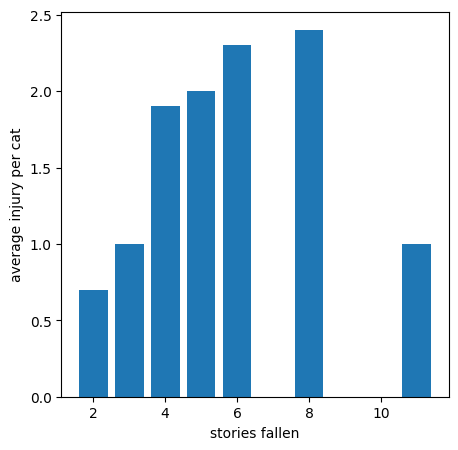

In [64]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
# change plot type to bar plot
ax.bar(cat_injuries['stories_fallen'], cat_injuries['average_injury_rate'])

ax.set_xlabel('stories fallen')
ax.set_ylabel('average injury per cat')


If we have the upper and lower deviations of error for each point, we can add them to the DataFrame.

In [65]:
upper_deviation = [0.1, 0.2, 0.3, 0.1, 0.5, 0.2, 0.6]
lower_deviation = [0.1, 0.4, 0.1, 0.2, 0.5, 0.6, 0.3]
cat_injuries_with_errors = pd.DataFrame({
    'stories_fallen': stories_fallen_list, 
    'average_injury_rate': injury_rate_list, 
    'upper_deviation': upper_deviation, 
    'lower_deviation': lower_deviation
    })

cat_injuries_with_errors

,stories_fallen,average_injury_rate,upper_deviation,lower_deviation
0,2,0.7,0.1,0.1
1,3,1.0,0.2,0.4
2,4,1.9,0.3,0.1
3,5,2.0,0.1,0.2
4,6,2.3,0.5,0.5
5,8,2.4,0.2,0.6
6,11,1.0,0.6,0.3


Text(0, 0.5, 'average injury per cat')

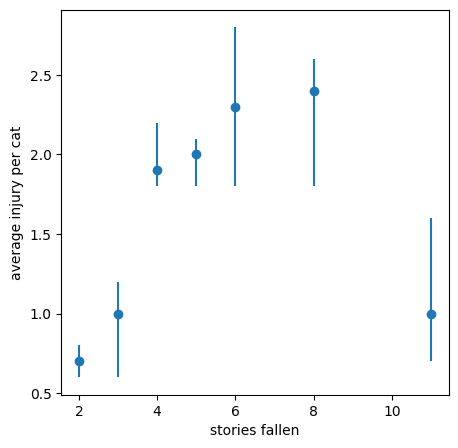

In [66]:


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
# change plot type to error bar
ax.errorbar(cat_injuries_with_errors['stories_fallen'], 
            cat_injuries_with_errors['average_injury_rate'], 
            yerr=[cat_injuries_with_errors['lower_deviation'], cat_injuries_with_errors['upper_deviation']], 
            fmt='o')

ax.set_xlabel('stories fallen')
ax.set_ylabel('average injury per cat')


# if ... in ... (optional)

 Experiment with testing whether items are included in iterable objects.

In [68]:
test = int(input())
if test in range(0,5):
    print(True)
else:
    print(False)

True


In [71]:
animal = input()
if animal in ['dog', 'cat', 'snake', 'bird']:
    print(True)
else:
    print(False)

False


We can prevent the error in the catalog example from occurring by first checking whether the key exists in the dictionary using the dictionary method `.keys()` and an `if...in...` statement.

In [ ]:
catalog = {'1008':'widget', '2149':'flange', '19x5':'smoke shifter', '992':'poiuyt'}
print(catalog.keys())

part_number = input("What part do you want to order? ")
if part_number in catalog.keys():
    print('You have ordered a ' + catalog[part_number])
else:
    print("Sorry, that part isn't available.")
print("It's been a pleasure doing business with you!")

# Tuples (optional)

Experiment with the following code cells. Notice that tuples are created with parentheses, not square brackets like lists or curly brackets like dictionaries.

In [ ]:
animals = ('dog', 'cat', 'snake', 'bird')
print(animals)
print(type(animals))
print(animals[0])
print(animals[3])

The `.items()` dictionary method produces an iterable object composed of tuples.

In [ ]:
catalog = {'1008':'widget', '2149':'flange', '19x5':'smoke shifter', '992':'poiuyt'}
print(catalog.items())
for item in catalog.items():
    print(item, type(item))

We can print the catalog by iterating through all of the key/value pairs using the `.items()` dictionary method. The user will then be able to see the possible choices.

The two parts of the item tuple can be referenced by indices.

In [ ]:
catalog = {'1008':'widget', '2149':'flange', '19x5':'smoke shifter', '992':'poiuyt'}

for item in catalog.items():
    print(item) # comment out this line after you see structure of the iterated tuples
    print(item[0], item[1])
print()

part_number = input("Enter the number of the part you want to order: ")
print()
if part_number in catalog.keys():
    print('You have ordered a ' + catalog[part_number])
else:
    print("Sorry, that part isn't available.")
print("It's been a pleasure doing business with you!")

The series of items in a tuple can be unpacked into a series of variables as in the following code

In [ ]:
# tuple literals can be generated by putting a sequence of items in parentheses
number, string = (1, 'xyz')
print(number, string)

We can asign each part of the iterator tuple to a separate variable using the following code.

In [ ]:
catalog = {'1008':'widget', '2149':'flange', '19x5':'smoke shifter', '992':'poiuyt'}
print('number', 'part')
print('-----------')
for number, part in catalog.items():
    print(number, part)
print()

part_number = input("Enter the number of the part you want to order: ")
print()
if part_number in catalog.keys():
    print('You have ordered a ' + catalog[part_number])
else:
    print("Sorry, that part isn't available.")
print("It's been a pleasure doing business with you!")